Synthetic case CA-ST (diffusion only)(avg from data noise) (06 may, no additional data, this one with additional data)

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import ipyplot
from advection_diffusion_inference_utils import read_experiment_data


In [87]:
def matplotlib_setup(SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE):
    plt.rc('font', size=MEDIUM_SIZE)         # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title 

In [2]:
list_CASTSynthDiff = np.array(['../../../Collab-BrainEfflux-Data/v21May2024_c//outputm1_r_NUTS_sampleMean_m1:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5/experiment_m1_r_NUTS_sampleMean_m1:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5.png',
       '../../../Collab-BrainEfflux-Data/v21May2024_c//outputm4_l_NUTS_sampleMean_m4:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5/experiment_m4_l_NUTS_sampleMean_m4:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5.png',
       '../../../Collab-BrainEfflux-Data/v21May2024_c//outputm1_l_NUTS_sampleMean_m1:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5/experiment_m1_l_NUTS_sampleMean_m1:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5.png',
       '../../../Collab-BrainEfflux-Data/v21May2024_c//outputm4_r_NUTS_sampleMean_m4:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5/experiment_m4_r_NUTS_sampleMean_m4:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5.png',
       '../../../Collab-BrainEfflux-Data/v21May2024_c//outputm3_r_NUTS_sampleMean_m3:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5/experiment_m3_r_NUTS_sampleMean_m3:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5.png',
       '../../../Collab-BrainEfflux-Data/v21May2024_c//outputm6_r_NUTS_sampleMean_m6:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5/experiment_m6_r_NUTS_sampleMean_m6:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5.png',
       '../../../Collab-BrainEfflux-Data/v21May2024_c//outputm3_l_NUTS_sampleMean_m3:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5/experiment_m3_l_NUTS_sampleMean_m3:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5.png'])

print(len(list_CASTSynthDiff))

7


In [8]:

ipyplot.plot_images(list_CASTSynthDiff, img_width=800/3)

Corresponding real ones (but 0.2 noise): CA-ST (diffusion only)

In [12]:
list_CASTRealDiff = np.array(['../../../Collab-BrainEfflux-Data/April_2x_2024_b//outputm6_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5/experiment_m6_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5.png',
       '../../../Collab-BrainEfflux-Data/April_2x_2024_b//outputm4_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5/experiment_m4_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5.png',
       '../../../Collab-BrainEfflux-Data/April_2x_2024_b//outputm1_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5/experiment_m1_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5.png',
       '../../../Collab-BrainEfflux-Data/April_2x_2024_b//outputm3_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5/experiment_m3_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5.png',
       '../../../Collab-BrainEfflux-Data/April_2x_2024_b//outputm1_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5/experiment_m1_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5.png',
       '../../../Collab-BrainEfflux-Data/April_2x_2024_b//outputm6_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5/experiment_m6_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5.png'])

print(len(list_CASTRealDiff))

6


In [13]:
ipyplot.plot_images(list_CASTRealDiff, img_width=800/3)

All the cases / noise level from data average variance / Sampler NUTS / 3000 samples / ~12 hrs:

### Inverse:
1. CA (diffusion only)
    - 1.1. synthetic (m1-l) : 4 cases
        - constant/constant
        - constant/varying
        - varying/constant
        - varying/varying
    - 1.2. real (all mice, all ears) : 8 cases
        - varying


2. CA-ST (diffusion only)
    - 2.1 synthetic (m1-l) : 1 case
        - varying
    - 2.2 real (all mice, all ears) : 8 cases
        - varying

3. CA (advection-diffusion)
    - 3.1 synthetic (m1-l) : 2 cases
        - varying/small_a/varying
        - varying/large_a/varying
    - 3.2 real (all mice, all ears) : 8 cases
        - varying

Total number of cases: 4+ 8+ 1+ 8+ 2+ 8 = 31
Number of runs: 4 major runs: 
Create table
| Case | Number of runs | label | notes: | running? |
| --- | --- | --- | --- | --- |
| 1.1 | 4 | v14septCASynthDiff | | yes 9:00 am (2 done, 1 is running that is extra not needed) (results9)|
| 1.2 | 10? or 8 | v14septCARealDiff | | yes 11:54 (results11) |
| 2.1 | 10? or 8 | v14septCASTSynthDiff | it is okay to use old results, list_CASTSynthDiff above| yes 12:38 (results13) |
| 2.2 | 10? or 8 | v14septCASTRealDiff | it is okay to use old results, list_CASTRealDiff above| yes 1:22 (results15) |
| 3.1 | 2 | v14septCASynthAdvDiff | | yes 7:30 am (results8) |
| 3.2 | 10? or 8 | v14septCARealAdvDiff | | yes 11:40 (results10) |

**note**

results12 and results14 on hpc cluster can be deleted.


### Forward:
- Multiple advection for various Peclet numbers
- 2D photo of solution? or video?

### Analysis:
- The things I normally show (for at least one case)
- Look at the average mouse (1.2)
- The average mouse results
- Correlation between average diffusivity and a
- Table of errors in data / in reconstruction. The latter is for the synthetic cases.

### Error in estimation: (only heterogenous diffusivity and heterogenous inference)

Synth:
| Case | Error in data | Recon. error (diffusivity) | Recon. error (advection) | STD norm |
| --- | --- | --- | --- | --- |
| CA (diffusion only) |  |  |  |  |
| CA-ST (diffusion only)(avg mice) |  |  |  |  |
| CA-ST (diffusion only)(avg max mice) |  |  |  |  |
| CA-ST (diffusion only)(avg min mice) |  |  |  |  |
| CA (advection-diffusion) (small a) |  |  |  |  |
| CA (advection-diffusion) (large a) |  |  |  |  |

Real:

| Case | Error in data | STD norm |
| --- | --- | --- |
| CA (diffusion only)(avg mice) |  |  |
| CA (diffusion only)(max mice) | number / mouse and ear |  |
| CA (diffusion only)(min mice) |  |  |
| CA-ST (diffusion only)(avg mice) |  |  |
| CA-ST (diffusion only)(max mice) |  |  |
| CA-ST (diffusion only)(min mice) |  |  |
| CA (advection-diffusion) (avg mice) |  |  |
| CA (advection-diffusion) (max mice) |  |  |
| CA (advection-diffusion) (min mice) |  |  |


- define error in data
- define error in reconstruction for both diffusivity and advection


## 2. CA-ST (diffusion only)

### 2.1 synthetic (m1-l) : 1 case (varying)


1. Read data files

<div style="border: 2px solid #FFB74D; background-color: #FFF3E0; border-radius: 8px; padding: 10px; font-family: Arial, sans-serif; color: #333; box-shadow: 2px 2px 8px rgba(0, 0, 0, 0.1); max-width: 750px; margin: 0 auto;">
  <strong style="color: #E65100;">⚠️ Note:</strong> 
  These results will be updates
</div>

In [80]:
list_CASTSynthDiff = ['../../../Collab-BrainEfflux-Data/v21May2024_c/']*7
idx_list = [2, 0, 6, 4, 1, 3, 5]
list_CASTSynthDiff_tags = ["m1_r_NUTS_sampleMean_m1:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5",
                           "m4_l_NUTS_sampleMean_m4:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5",
                           "m1_l_NUTS_sampleMean_m1:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5",
                           "m4_r_NUTS_sampleMean_m4:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5",
                           "m3_r_NUTS_sampleMean_m3:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5",
                           "m6_r_NUTS_sampleMean_m6:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5",
                           "m3_l_NUTS_sampleMean_m3:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5"]


print(len(list_CASTSynthDiff))

7


In [82]:
# order file names
list_CASTSynthDiff = [list_CASTSynthDiff[idx] for idx in idx_list]
list_CASTSynthDiff_tags = [list_CASTSynthDiff_tags[idx] for idx in idx_list]


In [83]:


# read the data
data_dict_list = []
for i in range(len(list_CASTSynthDiff)):
    data_dict_list.append(read_experiment_data(list_CASTSynthDiff[i], list_CASTSynthDiff_tags[i]))



Reading file:  ../../../Collab-BrainEfflux-Data/v21May2024_c//outputm1_l_NUTS_sampleMean_m1:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5/m1_l_NUTS_sampleMean_m1:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5_var.pkl
Reading file:  ../../../Collab-BrainEfflux-Data/v21May2024_c//outputm1_r_NUTS_sampleMean_m1:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5/m1_r_NUTS_sampleMean_m1:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5_var.pkl
Reading file:  ../../../Collab-BrainEfflux-Data/v21May2024_c//outputm3_l_NUTS_sampleMean_m3:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFro

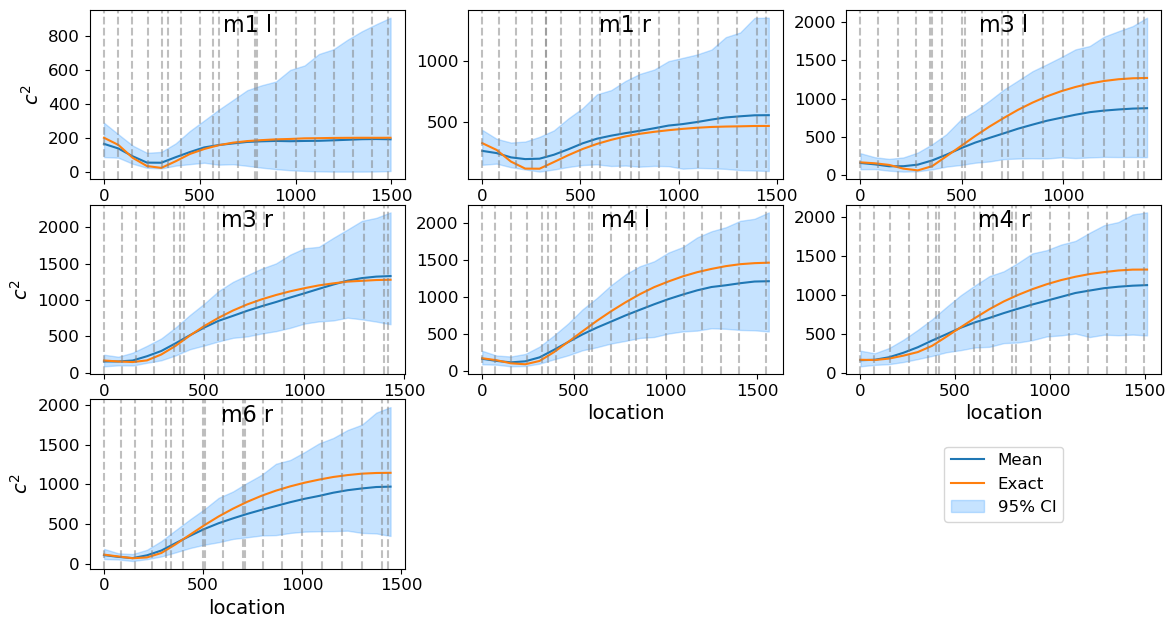

In [97]:
matplotlib_setup(12, 14, 16)

# powerpoint slide size in inches: 13.333 x 7.5 (widescreeen)
# obtain samples and plot the ci
samples_list = []
exact_list = []
locations_list = []
ess_list = []
for data_dict in data_dict_list:
    samples_list.append(data_dict['samples'])
    ess_list.append(samples_list[-1].compute_ess())
    exact_list.append(data_dict['exact'])
    locations_list.append(data_dict['locations'])


#Create a 3 by 3 grid of plots
fig, axs = plt.subplots(3, 3, figsize=(12, 6.5))
#Plot the first 7 samples in
for i in range(3):
    for j in range(3):
        idx = 3*i+j
        if idx == len(samples_list):
            # clear the axis
            axs[i, j].axis('off')
        elif idx > len(samples_list): 
            # plot legend
            plt.sca(axs[i, j])
            axs[i, j].axis('off')
            plt.legend(fig_ifo, ['Mean', 'Exact', '95% CI'], loc='center', bbox_to_anchor=(0.5, 0.5))
        else:
        
            samples = samples_list[idx]
            exact = exact_list[idx]
            plt.sca(axs[i, j])
            fig_ifo = samples.plot_ci(exact=exact)
            # plot vertical gray lines at the locations
            for location in locations_list[idx]:
                plt.axvline(x=location, color='gray', linestyle='--', alpha=0.5)
            # turn off the legend
            plt.legend().set_visible(False)
            # turn off x-axis label for all figures except image 5,6,7
            # which mouse, which ear
            plt.title(
                list_CASTSynthDiff_tags[idx].split('_')[0] + ' ' + list_CASTSynthDiff_tags[idx].split('_')[1],
                x=0.5, y=0.82)

# remove y ticks 
# add x label for (1,1), (1,2), (2,1)
axs[1, 1].set_xlabel('location')
axs[1, 2].set_xlabel('location')
axs[2, 0].set_xlabel('location')

# y label for (0,0), (1,0), (2,0)
axs[0, 0].set_ylabel('$c^2$')
axs[1, 0].set_ylabel('$c^2$')
axs[2, 0].set_ylabel('$c^2$')

# tighten the figure
plt.tight_layout()
# remove white space
plt.subplots_adjust(wspace=0.2, hspace=0.15)


In [95]:
#min max avg
ess_list
print('min ess:', np.min(ess_list))
print('max ess:', np.max(ess_list))
print('avg ess:', np.mean(ess_list))

min ess: 60.07428248951892
max ess: 1430.4550473354418
avg ess: 233.43239896647273
